In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [36]:
#read data from csv file
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [37]:
# My research question is to check if the diabetes Outcomes and BMI affect the Glucose level
# Select the columns for my research question
df1 = df[["Glucose", "BMI", "Outcome"]]
df1

Glucose   BMI  Outcome
0        148  33.6        1
1         85  26.6        0
2        183  23.3        1
3         89  28.1        0
4        137  43.1        1
..       ...   ...      ...
763      101  32.9        0
764      122  36.8        0
765      121  26.2        0
766      126  30.1        1
767       93  30.4        0

[768 rows x 3 columns]

In [38]:
# Check if there are zero values in Glucose
0 in df1['Glucose'].values

True

In [39]:
# Check if there are zero values in BMI
0 in df1['BMI'].values

True

In [16]:
# Replace the zero values to the median value of the column,since they are not meaningful
nonzero_median_Glucose = df1.loc[df["Glucose"]!=0, "Glucose"].median()
nonzero_median_BMI = df1.loc[df["BMI"]!=0, "BMI"].median()
df1.loc[df1["Glucose"]==0,'Glucose'] = nonzero_median_Glucose
df1.loc[df1["BMI"]==0,'BMI'] = nonzero_median_BMI
df1

C:\Users\73660\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Glucose   BMI  Outcome
0        148  33.6        1
1         85  26.6        0
2        183  23.3        1
3         89  28.1        0
4        137  43.1        1
..       ...   ...      ...
763      101  32.9        0
764      122  36.8        0
765      121  26.2        0
766      126  30.1        1
767       93  30.4        0

[768 rows x 3 columns]

In [17]:
# Assign groups for BMI column
BMI_group_conditions = [(df1["BMI"] <= 18),(df1["BMI"] <= 25) & (df1["BMI"] > 18),
                        (df1["BMI"] <= 30) & (df1["BMI"] > 25),(df1["BMI"] > 30)]
BMI_group_values = ["UnderWeight","NormalWeight","OverWeight","Obesity"]
df1["BMI_Group"] = np.select(BMI_group_conditions, BMI_group_values)
df1

C:\Users\73660\AppData\Local\Temp/ipykernel_13364/2771218442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["BMI_Group"] = np.select(BMI_group_conditions, BMI_group_values)


Glucose   BMI  Outcome     BMI_Group
0        148  33.6        1       Obesity
1         85  26.6        0    OverWeight
2        183  23.3        1  NormalWeight
3         89  28.1        0    OverWeight
4        137  43.1        1       Obesity
..       ...   ...      ...           ...
763      101  32.9        0       Obesity
764      122  36.8        0       Obesity
765      121  26.2        0    OverWeight
766      126  30.1        1       Obesity
767       93  30.4        0       Obesity

[768 rows x 4 columns]

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

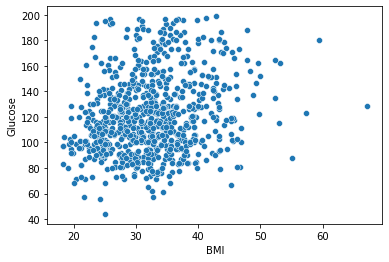

In [18]:
# Do the data visulization
sns.scatterplot(x='BMI', y='Glucose', data=df1)

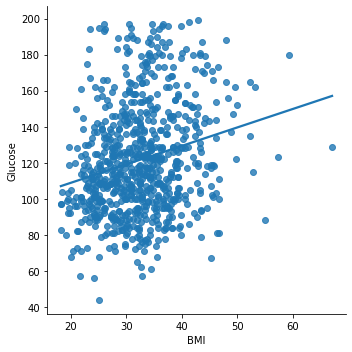

In [19]:
sns.lmplot(x='BMI', y='Glucose', data=df1, ci=None)
# From the above two graphs, we could find out that the Glucose level has a positive correlation with BMI level

C:\Users\73660\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


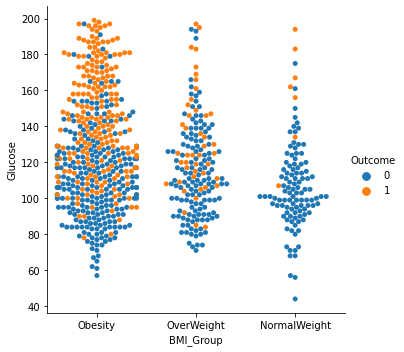

In [20]:
sns.catplot(data=df1, kind="swarm", x="BMI_Group", y="Glucose", hue="Outcome")
# From the graph here, we could find out that 
# 1. most people in the data is obesity people and their average Glucose level is significant higher than other two groups
# 2. among people in same BMI group, the Glucose level of diabetes people is significant higher than that of non-diabetes people 

In [44]:
# Do the t-test to ckeck whether the mean of Glucose level is affected by obesity or not
Not_Obesity = df1[df1["BMI"] != "Obesity"]
Obesity = df1[df1["BMI_Group"] == "Obesity"]
ttest_ind(Not_Obesity['Glucose'], Obesity['Glucose'])
# From the result, we could conclude that there is strong evidence to show that 
# the mean of Glucose level for obesity people is significant different from that for non-obesity people

Ttest_indResult(statistic=-2.585559810677836, pvalue=0.009835169122064382)

In [21]:
# Do the OLS multiple linear regression to check how the mean of Glucose level is affected by BMI groups and diabetes outcomes
lm = sfa.ols('Glucose ~ C(BMI_Group)+C(Outcome)', data=df1).fit()
lm.summary()
# From the result, we conld conclude that
# both the BMI groups and diabetes Outcomes have positive impact on the Glucose level
# and the diabetes Outcomes influence more than BMI groups
# in BMI groups, Obesity has the largest influence than the other groups

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     84.13
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.90e-47
Time:                        17:15:35   Log-Likelihood:                -3602.9
No. Observations:                 768   AIC:                             7214.
Df Residuals:                     764   BIC:                             7232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    105.8403      2.502     42.303      0.000     100.929     110.752
C(BMI_Group)[T.Obesity]        6.8077      2.898      2.349      0.019       1.119      12.496
C(BMI_Group)[T.OverWeight]     4.8358      3.205      1.509      0.132      -1.456      11.128
C(Outcome)[T.1]               29.9842      2.104     14.248      0.000      25.853      34.115
==============================================================================
Omnibus:                       18.064   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.001
Skew:                           0.380   Prob(JB):                     7.48e-05
Kurtosis:                       2.876   Cond. No.                         6.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Display the anova table for the regression
anova_table = sa.stats.anova_lm(lm)
print(anova_table)
# From the result, we could find out that
# there is significant difference between group means of both BMI groups and diabetes Outcomes
# and we need to use post hoc test to show the pairwise group differences

                 df         sum_sq        mean_sq           F        PR(>F)
C(BMI_Group)    2.0   34510.299673   17255.149837   24.679550  4.109727e-11
C(Outcome)      1.0  141942.652234  141942.652234  203.016538  5.046695e-41
Residual      764.0  534164.298093     699.167929         NaN           NaN


In [23]:
# Do the post hoc test for BMI groups
sp.posthoc_ttest(df1, val_col='Glucose', group_col='BMI_Group', p_adjust='holm')
# From the result, we could find out that significant differences in group means are obtained for all group pairs

Obesity  OverWeight  NormalWeight
Obesity       1.000000e+00    0.002572  3.215431e-08
OverWeight    2.571664e-03    1.000000  2.571664e-03
NormalWeight  3.215431e-08    0.002572  1.000000e+00

In [24]:
# Do the post hoc test for diabetes Outcomes
sp.posthoc_ttest(df1, val_col='Glucose', group_col='Outcome', p_adjust='holm')
# From the result, we could find out that significant differences in group means are obtained for all group pairs

1             0
1  1.000000e+00  3.128719e-48
0  3.128719e-48  1.000000e+00

In [ ]:
# Conclusion: the outcome of diabetes and BMI have positive impact on the Glucose level
#             and the diabetes Outcomes influence more than BMI groups
#             in BMI groups, Obesity has the largest influence than the other groups